# Predicting Wave Height at Chicago Beaches  

Understanding fluid dynamics is essential for water activities.  Chicago has an active sailing community offering sailboat tours, rentals and lessons.  Numerous sailing races and activities are held throughout the summer in Chicago and being able to choose the optimal weekend based on historical wave data is ideal.  

The Chicago Park District maintains sensors in Lake Michigan at 6 beaches along the lakefront.  The sensors are in operation during the summer and measurements are recorded hourly. This dataset will answer some basic questions including which beach has the largest and smallest waves? Does turbidity vary between beaches?  Does water temperature vary widely between beaches? 

This dataset was downloaded from data.world https://data.world/cityofchicago/beach-water-quality-automated-sensors. 
Source: City of Chicago https://data.cityofchicago.org/d/qmqz-2xku

## Key Terms  

Automated sensors recorded turbidity, wave height (in meters(m)), wave period (in seconds), transducer depth, and water temperature in ºC.  
**Turbidity** is the measure of relative clarity of a liquid.  
**Wave height** is the difference between elevations of a crest and a neighboring trough.  
**Transducer depth** is the depth of the sensor measured in meters.  

In [1]:
from initial_cleaning import initial_cleaning

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.mlab import PCA as mlabPCA

import warnings
import math
import seaborn as sns
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn import neighbors
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

%matplotlib inline
sns.set_style('white')
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams['figure.figsize'] = (20.0, 10.0)
sns.set_context('notebook', font_scale=1.5)

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [2]:
beach = pd.DataFrame(initial_cleaning('/Users/jamilab/Data_Science/Data_Sets/beach-water-quality-automated-sensors-1.csv'))

          Beach Name   Measurement Timestamp  Water Temperature  Turbidity  \
0     Montrose Beach  08/30/2013 08:00:00 AM             20.300      1.180   
1  Ohio Street Beach  05/26/2016 01:00:00 PM             14.400      1.230   
2      Calumet Beach  09/03/2013 04:00:00 PM             23.200      3.630   
3      Calumet Beach  05/28/2014 12:00:00 PM             16.200      1.260   
4     Montrose Beach  05/28/2014 12:00:00 PM             14.400      3.360   

   Transducer Depth  Wave Height  Wave Period  Battery Life  \
0             0.891        0.080        3.000         9.400   
1               nan        0.111        4.000        12.400   
2             1.201        0.174        6.000         9.400   
3             1.514        0.147        4.000        11.700   
4             1.388        0.298        4.000        11.900   

  Measurement Timestamp Label               Measurement ID  
0           8/30/2013 8:00 AM    MontroseBeach201308300800  
1          05/26/2016 1:00 PM 

In [3]:
beach = beach.dropna()

In [4]:
beach.isnull().sum()

Beach Name                     0
Measurement Timestamp          0
Water Temperature              0
Turbidity                      0
Transducer Depth               0
Wave Height                    0
Wave Period                    0
Battery Life                   0
Measurement Timestamp Label    0
Measurement ID                 0
dtype: int64

In [5]:
beach.shape

(10034, 10)

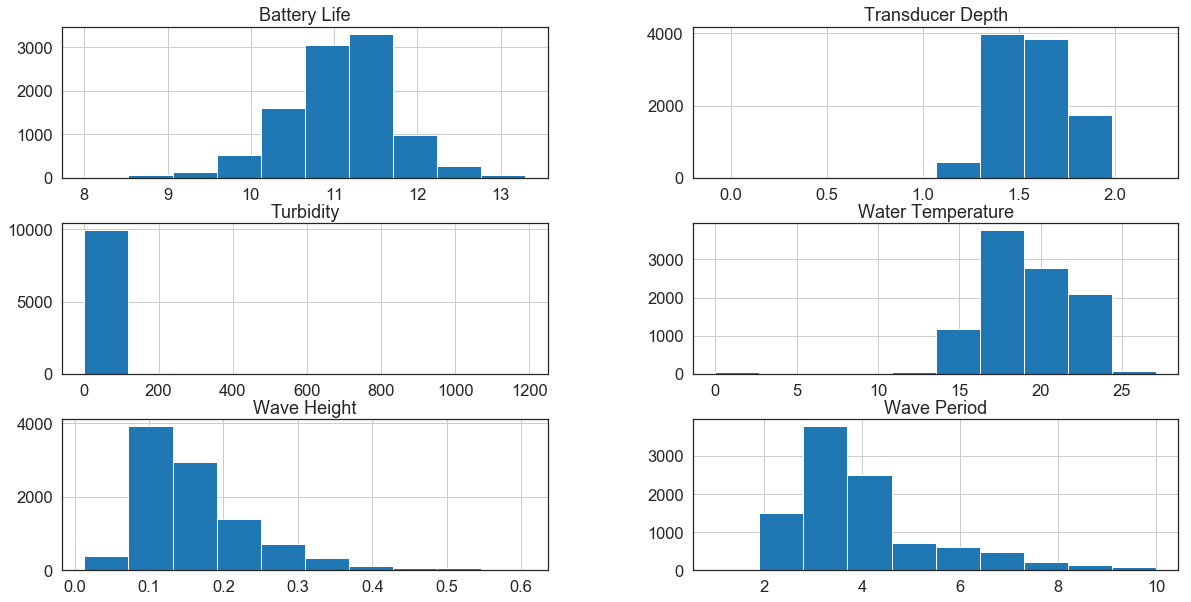

In [6]:
# Visualize the data
beach.hist()
plt.show();

## Which beaches have the largest and smallest waves?  

#### As shown in the swarm and box plots below, Montrose Beach has the largest waves.  Calumet Beach has the smallest waves.

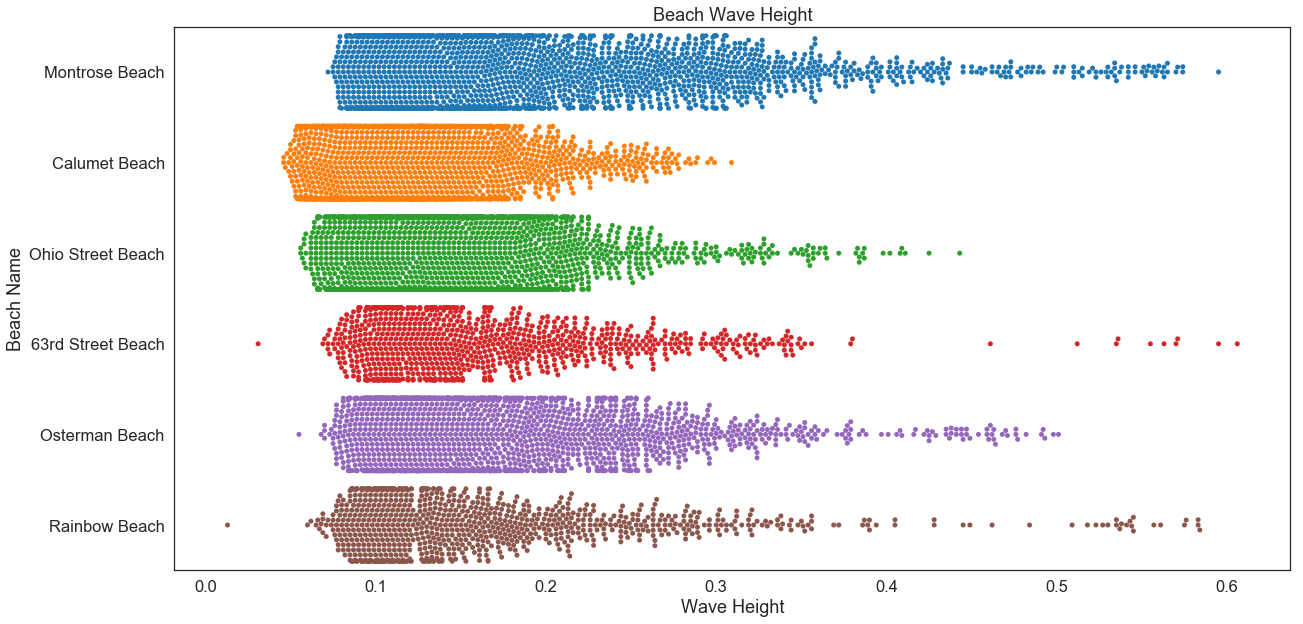

In [7]:
# wave height and beach

ax = sns.swarmplot(x='Wave Height', y='Beach Name', data=beach)
plt.title('Beach Wave Height')
ax.set(xlabel='Wave Height', ylabel='Beach Name')
plt.show();

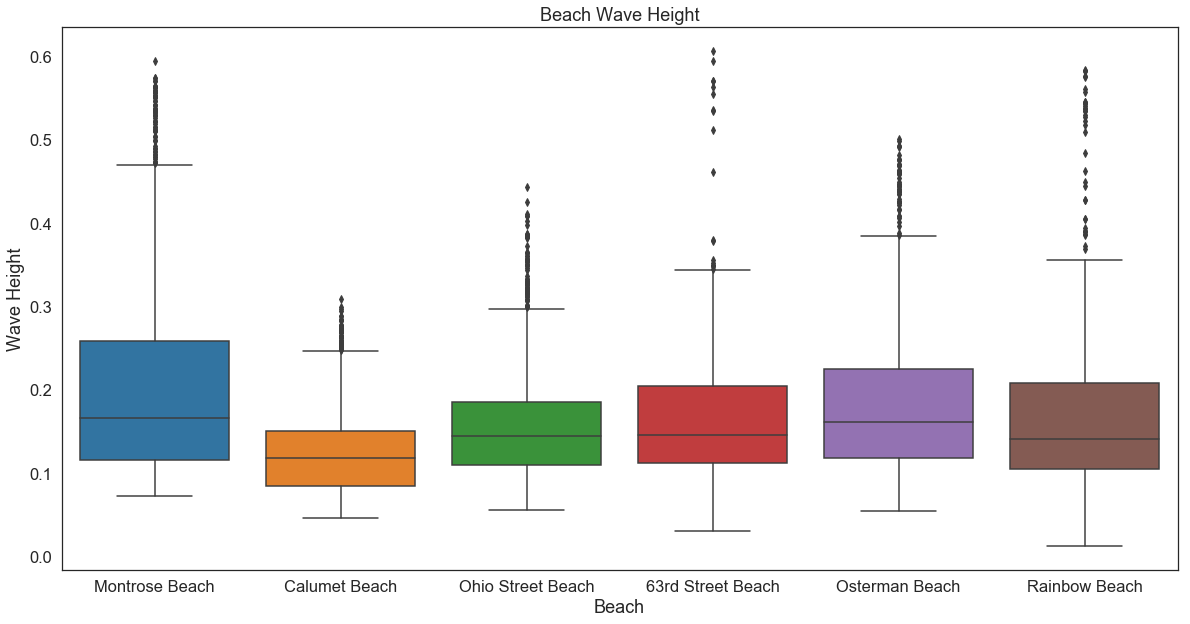

In [8]:
# wave height and beach name

ax = sns.boxplot(x='Beach Name', y='Wave Height', data=beach)
plt.title('Beach Wave Height')
ax.set(xlabel='Beach', ylabel='Wave Height')
plt.show();

## Does turbidity vary between beaches?  

#### Yes. Ohio Street Beach has the most turbid water of the 6 beaches.  This islikely due to Lake Michigan also being the main stem of the Y-shaped Chicago River.

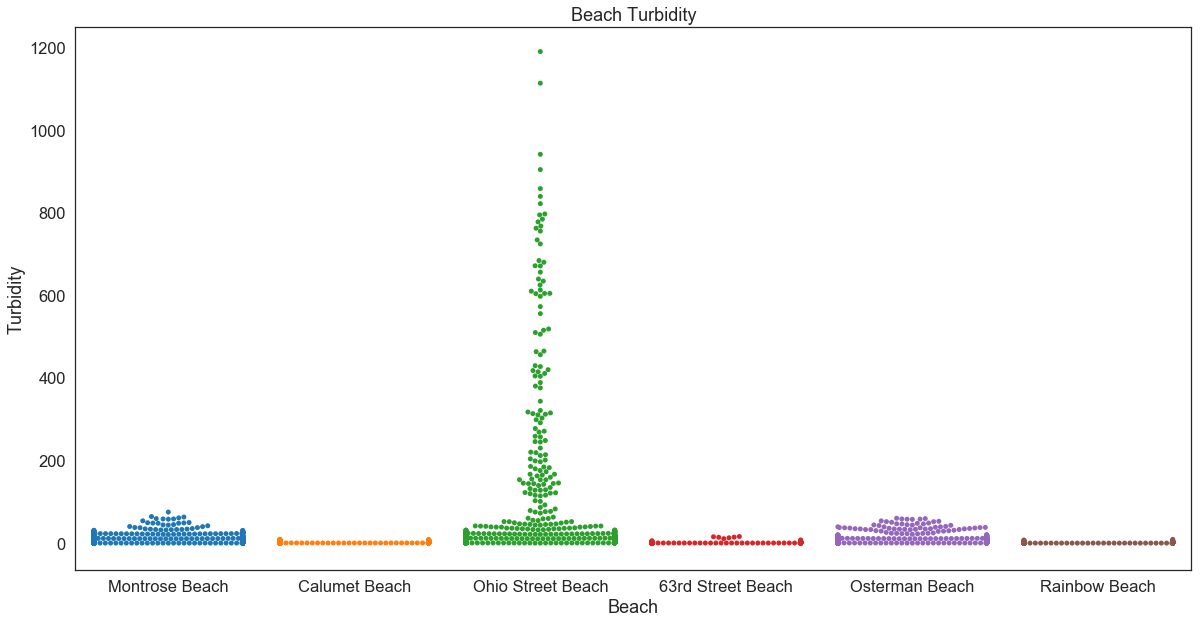

In [9]:
# turbidity and beach

ax = sns.swarmplot(x='Beach Name', y='Turbidity', data=beach)
plt.title('Beach Turbidity')
ax.set(xlabel='Beach', ylabel='Turbidity')
plt.show();

## Does water temperature vary significantly between beaches?  

#### No, water temperature doesn't vary widely betwee beaches.  The temperature appears consistent among the beaches with approximately a 3ºC difference between the highest and lowest temperatures.

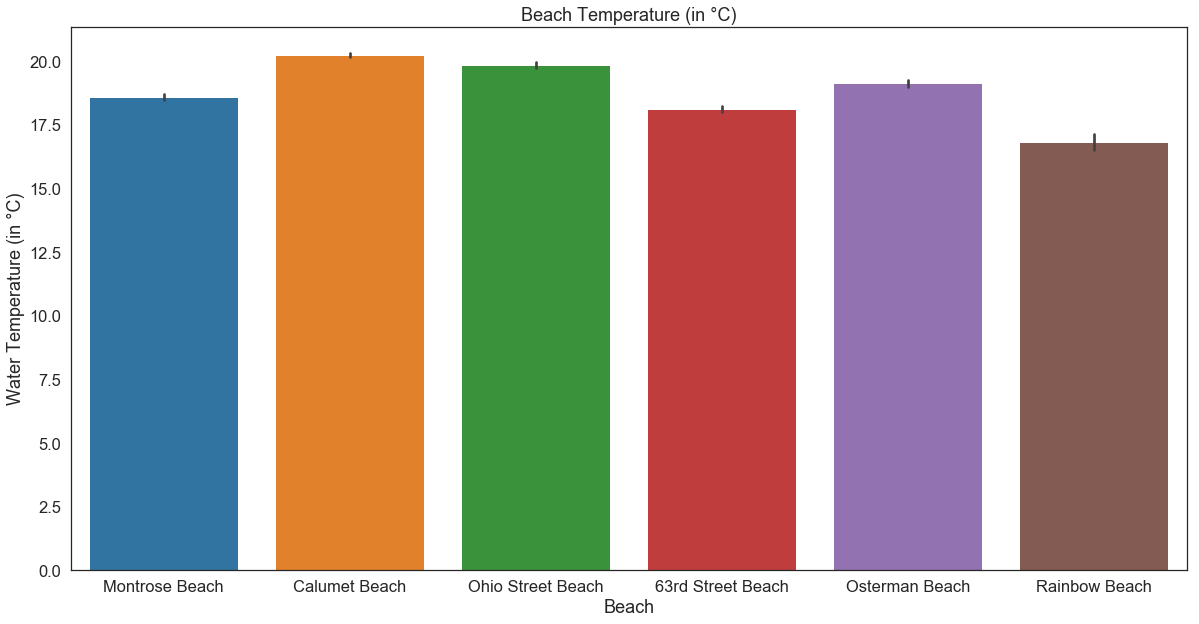

In [10]:
ax = sns.barplot(x='Beach Name', y='Water Temperature', data=beach)
plt.title('Beach Temperature (in °C)')
ax.set(xlabel='Beach', ylabel='Water Temperature (in °C)')
plt.show();

## Does wave period vary between beaches?  

#### No, wave period doesn't vary significantly between beaches.

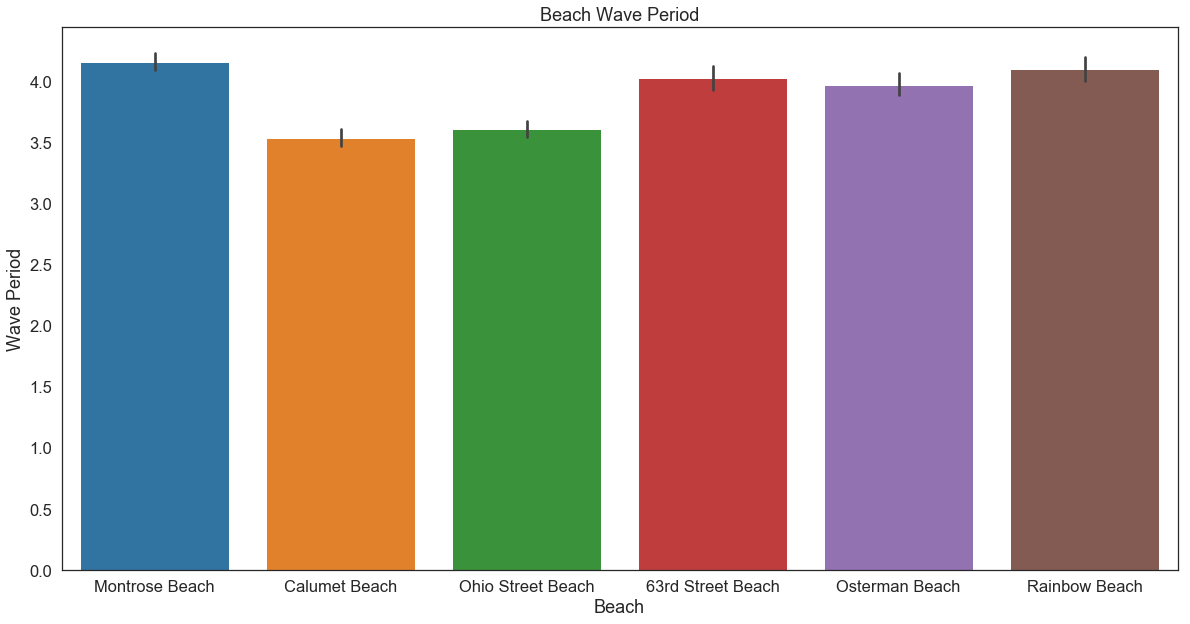

In [11]:
ax = sns.barplot(x='Beach Name', y='Wave Period', data=beach)
plt.title('Beach Wave Period')
ax.set(xlabel='Beach', ylabel='Wave Period')
plt.show();

## Does transducer depth vary between beaches?  

#### No, transducer depth does not vary widely between beaches.

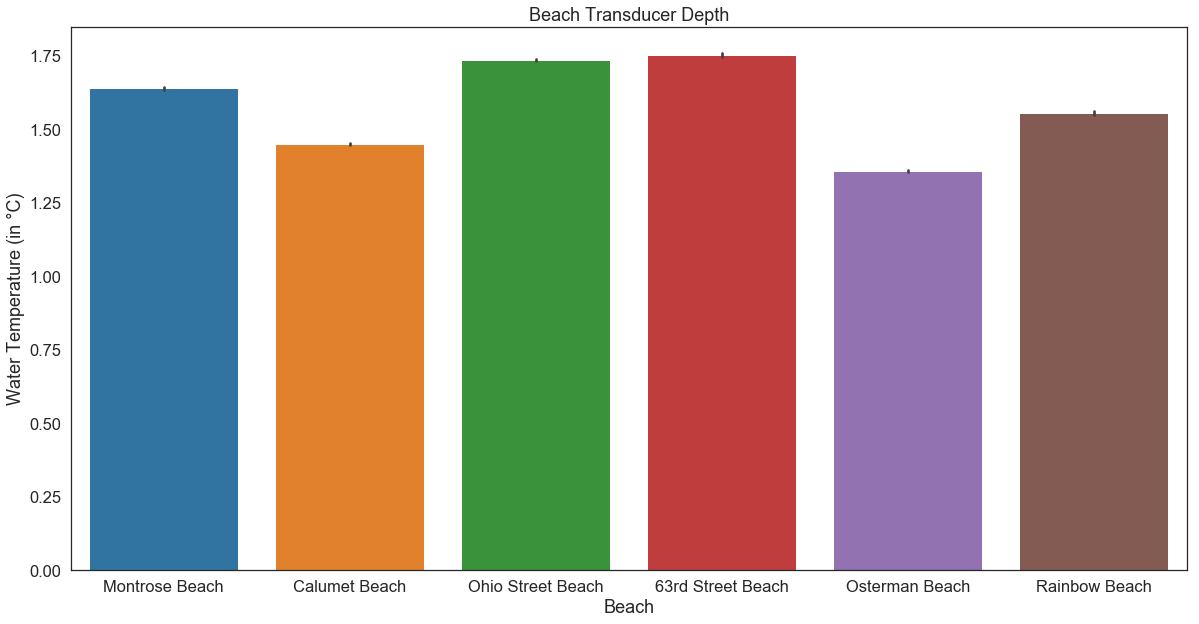

In [12]:
ax = sns.barplot(x='Beach Name', y='Transducer Depth', data=beach)  
plt.title('Beach Transducer Depth')
ax.set(xlabel='Beach', ylabel='Water Temperature (in °C)')
plt.show();

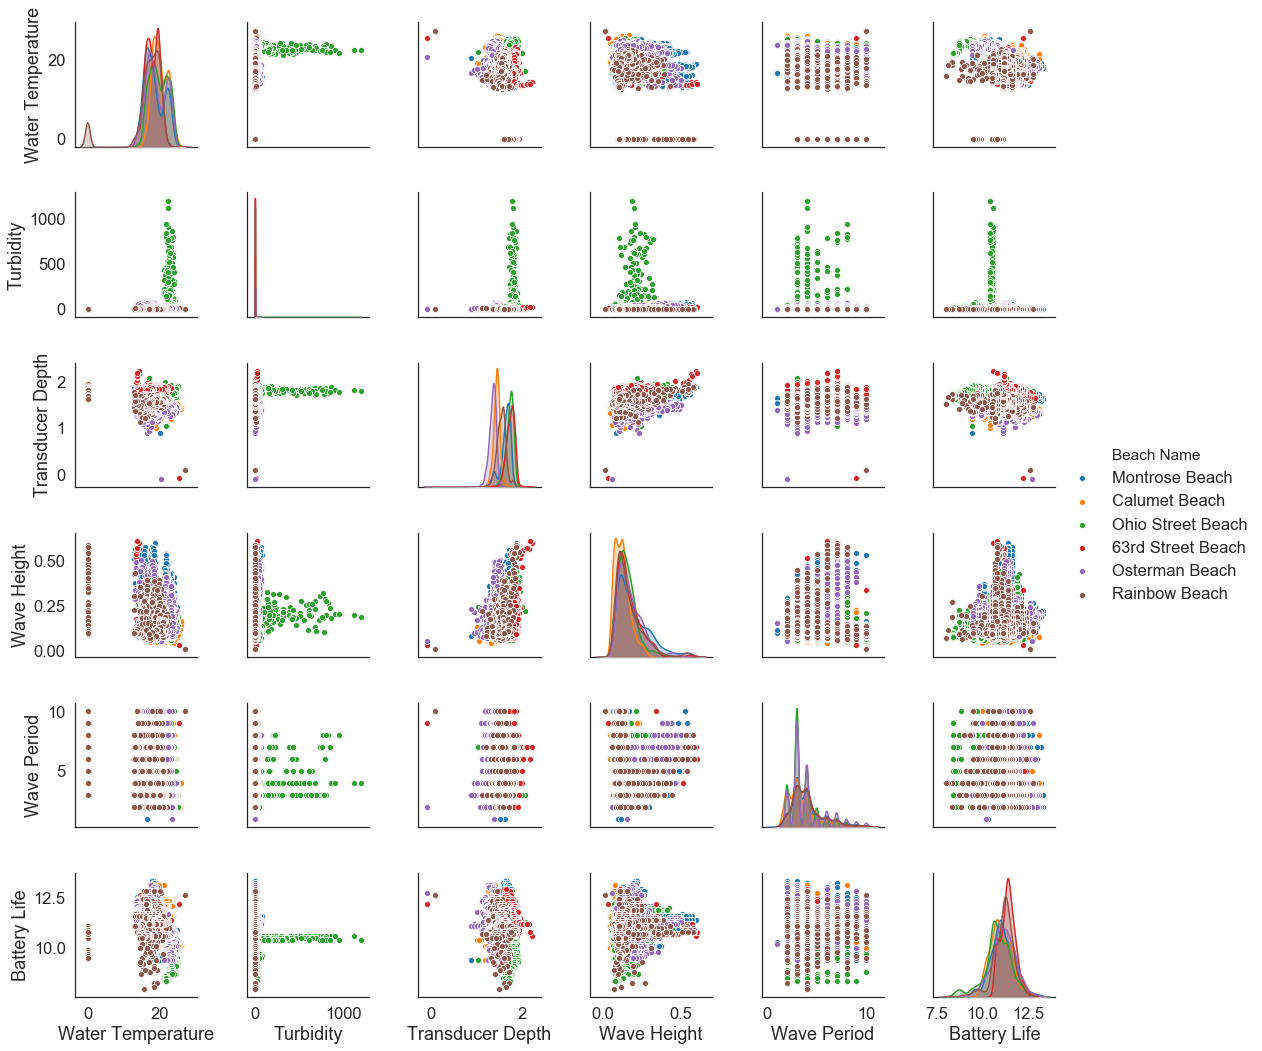

In [13]:
sns.pairplot(data=beach, hue='Beach Name');

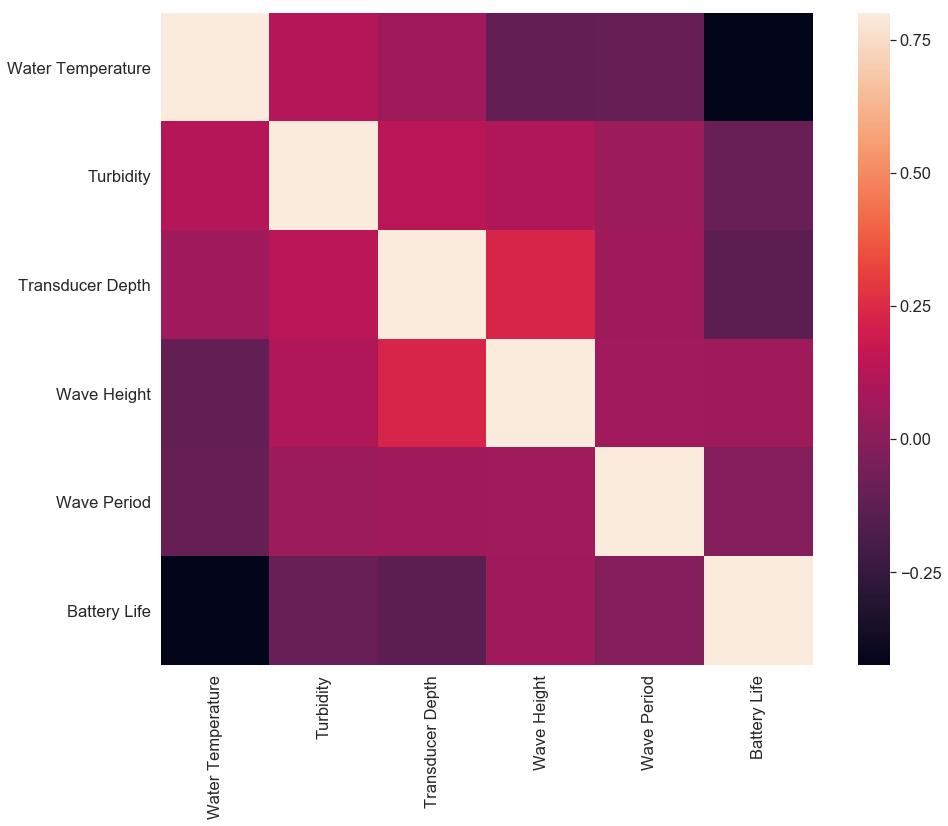

In [14]:
# correlation matrix

corrmat = beach.corr()

# Set up the matplotlib figure

f, ax = plt.subplots(figsize=(16, 12))

# Draw the heatmap using seaborn

sns.heatmap(corrmat, vmax=.8, square=True)
plt.show();

#print(beach.corr)

In [7]:
beach_name = pd.get_dummies(beach['Beach Name'])

In [8]:
beach = beach.drop('Beach Name', 1)

In [9]:
beach = pd.concat([beach, beach_name], axis = 1)

In [10]:
beach['Measurement Timestamp'] = pd.to_datetime(beach['Measurement Timestamp'])

In [11]:
beach['Measurement Timestamp Label'] = pd.to_datetime(beach['Measurement Timestamp Label'])

In [12]:
y = beach['Wave Height']
X = beach.drop(['Wave Height', 'Measurement ID', 'Measurement Timestamp', 'Measurement Timestamp Label'], axis=1)

In [13]:
# Divide into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
# instantiate linear regression model & perform cross validation

linreg = linear_model.LinearRegression()
linreg.fit(X_train, y_train)

print(linreg.score(X_test, y_test))

cross_val_score(linreg, X_test, y_test, cv=10)

0.221120516745


array([ 0.19121485,  0.2604086 ,  0.261584  ,  0.12540758,  0.23002681,
        0.10980925,  0.27286684,  0.22025552,  0.23197116,  0.21130986])

In [15]:
# instantiate & run random forest regression tree with 10 fold cross validation

rfr = ensemble.RandomForestRegressor()
rfr.fit(X_train, y_train)

print(rfr.score(X_test, y_test))

cross_val_score(rfr, X_test, y_test, cv=10)

0.7706355102


array([ 0.66509718,  0.75358856,  0.76855295,  0.69527484,  0.71339169,
        0.75391787,  0.66953207,  0.74735886,  0.68409688,  0.67135677])

In [16]:
# instantiate & run ridge regression model with 10-fold cross validation

ridgereg = linear_model.Ridge(fit_intercept=False) 
ridgereg.fit(X_train, y_train)

print(ridgereg.score(X_test, y_test))

cross_val_score(ridgereg, X_test, y_test, cv=10)

0.222335555801


array([ 0.18587614,  0.25519833,  0.24671711,  0.1520698 ,  0.21377892,
        0.11567043,  0.26154424,  0.22009931,  0.22644155,  0.21544225])

In [17]:
# Build knn regression model

knn = neighbors.KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

print(knn.score(X_test, y_test))

cross_val_score(knn, X_test, y_test, cv=10)

0.651094049694


array([ 0.50330137,  0.61980342,  0.66118559,  0.48080003,  0.46373414,
        0.52116807,  0.5395705 ,  0.5952821 ,  0.48778087,  0.60257407])

In [18]:
# Run the model again with weights

knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
knn_w.fit(X_train, y_train)

print(knn_w.score(X_test, y_test))
cross_val_score(knn_w, X_test, y_test, cv=10)

0.688517491193


array([ 0.53887504,  0.68893303,  0.69101961,  0.54933259,  0.56996962,
        0.59290071,  0.57814077,  0.63768428,  0.53798985,  0.63843274])

In [19]:
# knn cross validation for unweighted & weighted models

score = cross_val_score(knn, X_test, y_test, cv=10)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

score_w = cross_val_score(knn_w, X_test, y_test, cv=10)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: 0.55 (+/- 0.13)
Weighted Accuracy: 0.60 (+/- 0.11)


## Model Evaluation   

#### Random forest regressor performed the best with a prediction accuracy of 76%, followed by weighted KNN with an accuracy of 68%.  Consistent cross validation scores suggest random forest regression is a stable model.  While KNN has an accuracy score of 68%, the upper and lower bounds being greater than 10 percentage points suggests the model is not as stable as random forest.  

#### Linear and ridge regression models performed extremely poorly on this data. 

## Feature Engineering  

#### Feature engineering will be performed by creating interactions between features in an effort to improve prediction accuracy.

In [20]:
# Create interactions to capture potential relationships between features

beach['water_turbidity'] = beach['Water Temperature'] * beach['Turbidity']
beach['water_transd_depth'] = beach['Water Temperature'] * beach['Transducer Depth']
beach['temp_wave_period'] = beach['Water Temperature'] * beach['Wave Period']
beach['turbidity_transd_depth'] = beach['Turbidity']  * beach['Transducer Depth']
beach['turbidity_wave_period'] = beach['Turbidity'] * beach['Wave Period']
beach['trans_depth_wave_period'] = beach['Transducer Depth'] * beach['Wave Period']

In [21]:
# create a dataframe to hold features

features = pd.concat([beach.copy()], axis = 1)

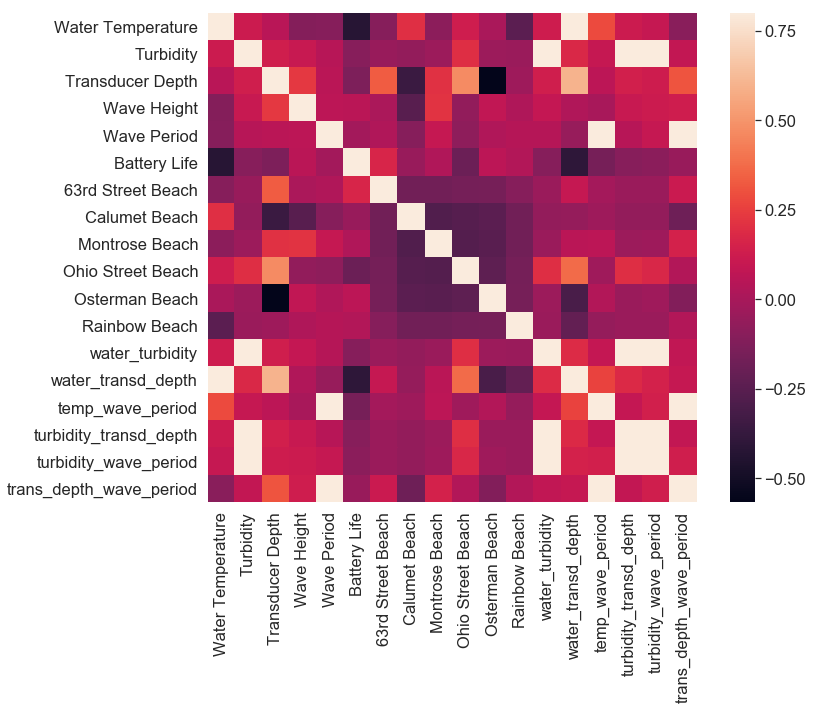

In [22]:
# view a correlation matrix to determine collinearity, if any

corrmat = features.corr()

# Set up the matplotlib figure.

f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn

sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [23]:
means = features[['Turbidity', 'turbidity_transd_depth', 'turbidity_wave_period', 'temp_wave_period']].mean(axis=0)
stds = features[['Turbidity', 'turbidity_transd_depth', 'turbidity_wave_period', 'temp_wave_period']].std(axis=0)
features['transd_wave_turbid'] = ((features[['Turbidity', 'turbidity_transd_depth', 'turbidity_wave_period', 
                                             'temp_wave_period']] - means) / stds).mean(axis=1)

# Check how well the composite correlates with each individual variable

plotdf = features.loc[:, ['Turbidity', 'turbidity_transd_depth', 'turbidity_wave_period', 'temp_wave_period']]
plotdf['transd_wave_turbid'] = features['transd_wave_turbid'] 
corrmat2 = plotdf.corr()

print(corrmat2)

                        Turbidity  turbidity_transd_depth  \
Turbidity                   1.000                   1.000   
turbidity_transd_depth      1.000                   1.000   
turbidity_wave_period       0.935                   0.934   
temp_wave_period            0.095                   0.094   
transd_wave_turbid          0.940                   0.939   

                        turbidity_wave_period  temp_wave_period  \
Turbidity                               0.935             0.095   
turbidity_transd_depth                  0.934             0.094   
turbidity_wave_period                   1.000             0.139   
temp_wave_period                        0.139             1.000   
transd_wave_turbid                      0.933             0.412   

                        transd_wave_turbid  
Turbidity                            0.940  
turbidity_transd_depth               0.939  
turbidity_wave_period                0.933  
temp_wave_period                     0.412  
trans

In [24]:
# change 0ºC to .001º to avoid 0 division error 

beach['Water Temperature'] = beach['Water Temperature'].replace(0, 0.001, regex=True)

In [25]:
del X_train
del X_test
del y_train
del y_test

In [26]:
y = beach['Wave Height']
X = beach.drop(['Wave Height', 'Measurement ID', 'Measurement Timestamp', 'Measurement Timestamp Label'], axis=1)

In [27]:
# Divide into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
# instantiate linear regression model & perform cross validation

linreg = linear_model.LinearRegression()
linreg.fit(X_train, y_train)

print(linreg.score(X_test, y_test))

cross_val_score(linreg, X_test, y_test, cv=10)

0.336422755852


array([ 0.22613509,  0.42881616,  0.43109507,  0.25433017,  0.37846044,
        0.26338424,  0.27042837,  0.4028449 ,  0.29295405,  0.29208222])

In [29]:
# instantiate & run regression tree with 10 fold cross validation

rfr = ensemble.RandomForestRegressor()
rfr.fit(X_train, y_train)

print(rfr.score(X_test, y_test))

cross_val_score(rfr, X_test, y_test, cv=10)

0.74633232528


array([ 0.67311317,  0.72872931,  0.74687537,  0.66867148,  0.70451692,
        0.70740099,  0.66083014,  0.67596229,  0.66355825,  0.66493229])

In [30]:
# instantiate & run ridge regression for feature engineered data with 10 fold cross validation

ridgereg = linear_model.Ridge()
ridgereg.fit(X_train, y_train)

print('\nFeature engineered data:')
print(ridgereg.score(X_test, y_test))

cross_val_score(ridgereg, X_test, y_test, cv=10)


Feature engineered data:
0.333905716305


array([ 0.23341079,  0.43181601,  0.42309087,  0.24451317,  0.38004668,
        0.18349047,  0.26205378,  0.39841864,  0.29102689,  0.30507812])

In [31]:
# Build knn regression model

knn = neighbors.KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

print(knn.score(X_test, y_test))

cross_val_score(knn, X_test, y_test, cv=10)

0.531307261492


array([ 0.43515392,  0.51782913,  0.58512583,  0.3245834 ,  0.3629865 ,
        0.42641663,  0.43937667,  0.56188036,  0.42603293,  0.52887922])

In [32]:
# Run the model again with weights

knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
knn_w.fit(X_train, y_train)

print(knn_w.score(X_test, y_test))
cross_val_score(knn_w, X_test, y_test, cv=10)

0.554628755515


array([ 0.44742558,  0.56675375,  0.59837327,  0.32602533,  0.43044077,
        0.48372921,  0.45356334,  0.59230008,  0.41939641,  0.5491859 ])

In [33]:
# knn cross validation for unweighted & weighted models

score = cross_val_score(knn, X_test, y_test, cv=10)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

score_w = cross_val_score(knn_w, X_test, y_test, cv=10)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: 0.46 (+/- 0.16)
Weighted Accuracy: 0.49 (+/- 0.17)


## Model Evaluation  

#### After creating interactions, linear regression and ridge regression accuracy improved by approximately 10%.  The improvement was not sufficient for consideration and the scores remain unacceptably low.    

#### After creating interactions, random forest regression dropped approximately 4 percentage points in accuracy.  Creating interactions did not improve accuracy.  

#### Both the weighted and unweighted KNN models performed worse after creating interactions with approximately a  13% decrease in accuracy.  The margin of error increased from approximately 10% to nearly 20%.

## Feature Importance  

#### Random forest identified turbidity_transd_depth, Ohio Street Beach and transducer_depth as the top 3 features affecting prediction accuracy.

                         importance
Feature                            
turbidity_transd_depth        0.250
Transducer Depth              0.113
Ohio Street Beach             0.106
Battery Life                  0.090
turbidity_wave_period         0.083
water_transd_depth            0.061
Water Temperature             0.058
temp_wave_period              0.051
trans_depth_wave_period       0.050
Turbidity                     0.038
water_turbidity               0.035
Calumet Beach                 0.022
Wave Period                   0.018
Rainbow Beach                 0.011
Montrose Beach                0.006
63rd Street Beach             0.006
Osterman Beach                0.003


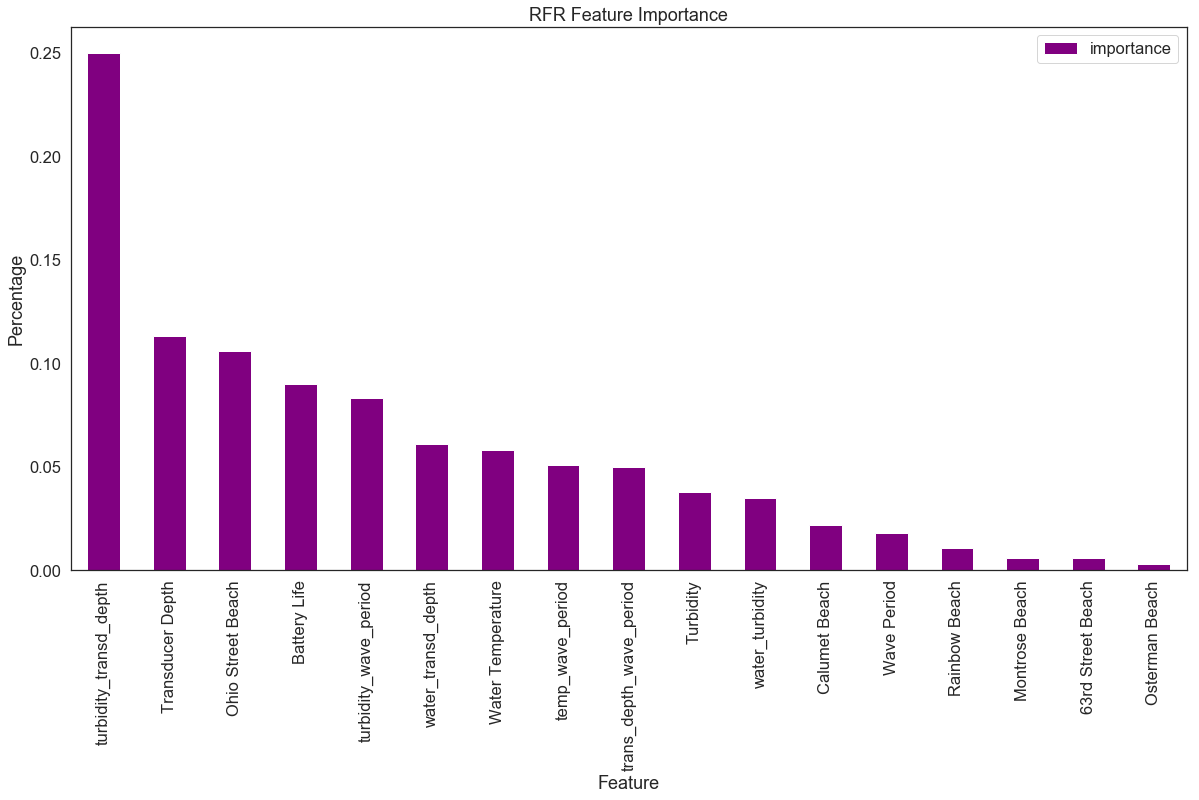

In [34]:
# rfr feature importance

importances = pd.DataFrame({'Feature':X_train.columns,'importance':np.round(rfr.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('Feature')
 
print(importances[:20])
importances[:20].plot.bar(color='purple')
plt.title('RFR Feature Importance')
plt.ylabel('Percentage');

In [36]:
# PCA using skLearn

X_pca = PCA(n_components=4)
y_pca = X_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each component.\n',
    X_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component.
 [  9.93013719e-01   6.13577600e-03   8.06689436e-04   2.98972817e-05]


## K-Means  

#### The clusters produced are unintuitive, not clearly defined, nor are they spherical.  The odd shape indicates that the data does not meet an implicit assumption of the k-means algorithm.

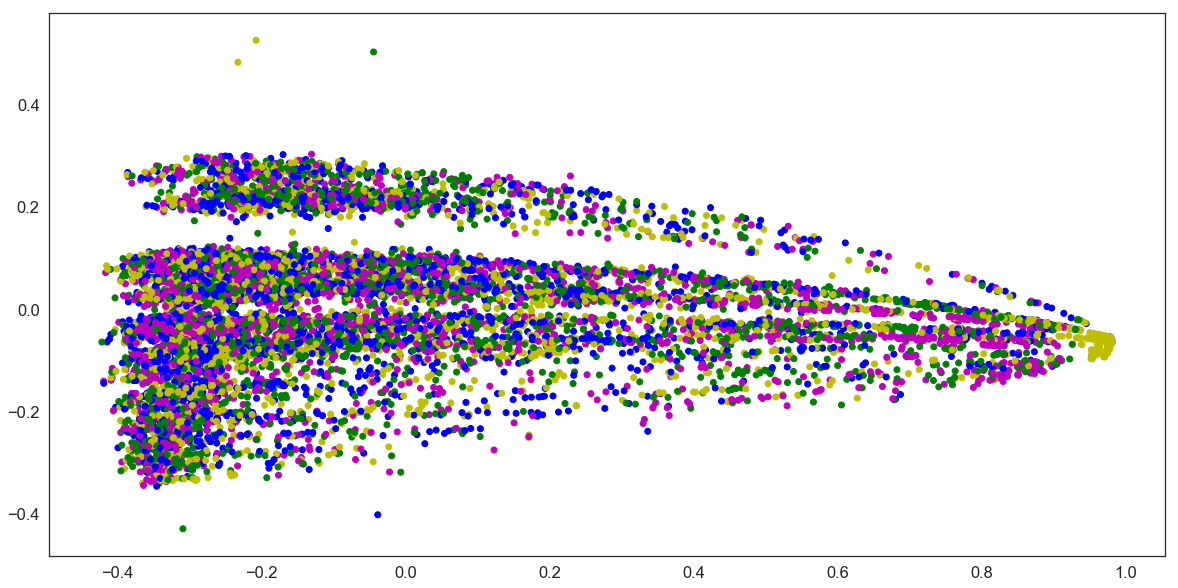

In [41]:
# K-Means
# Define the features and the outcome.

# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components.
X_PCA = PCA(2).fit_transform(X_norm)

# Calculate predicted values.
km = KMeans(n_clusters=4, random_state=42).fit_predict(X_PCA)

# Plot the solution.
plt.scatter(X_PCA[:, 0], X_PCA[:, 1], c='mybg')
plt.show()

In [44]:
# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(km, y))

Comparing k-means clusters against the data:
Wave Height  0.013  0.031  0.046  0.047  0.048  0.049  0.050  0.051  0.052  \
row_0                                                                        
0                0      0      0      0      0      0      0      0      0   
1                1      1      2      1      1      2      4      2      5   
2                0      0      0      0      0      0      0      0      0   
3                0      0      0      0      0      0      0      0      0   

Wave Height  0.053  ...    0.565  0.570  0.571  0.574  0.575  0.576  0.583  \
row_0               ...                                                      
0                0  ...        2      2      2      2      0      0      0   
1                5  ...        0      0      0      0      0      0      0   
2                1  ...        0      0      0      0      0      0      0   
3                0  ...        0      0      0      0      1      1      2   

Wave Height  0.58

## Model Performance  

#### Random forest regressor is the most consistent performer for the data.  Instead of creating interactions, model tuning could likely increase accuracy.  Having more data would also be beneficial for fitting and testing.  

## Business Recommendations  

#### Wave height data would be help identify the best water conditions for water sports and recreational activities.  In conjunction with weather data changes in water temperature, wave height, wave period and turbidity can be monitored to establish a baseline for normal conditions with the added benefit of providing insight on abnormal conditions. 